<a href="https://colab.research.google.com/github/MinhAnh99/Python_RFM_Analysis/blob/main/MinhAnh_RFM_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
!pip install squarify
import squarify as sq


In [2]:
# Loading dataset
Orders_RFM = pd.read_excel('Dataset.xlsx')

In [3]:
Orders_RFM.describe()

,Row ID,Postal Code,Sales,Quantity,Unit Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,53.120197
std,2885.163629,32063.693350,623.245101,2.225110,122.251398
min,1.000000,1040.000000,0.444000,1.000000,0.544500
25%,2499.250000,23223.000000,17.280000,2.000000,3.473600
50%,4997.500000,56430.500000,54.490000,3.000000,12.933600
75%,7495.750000,90008.000000,209.940000,5.000000,54.522000
max,9994.000000,99301.000000,22638.480000,14.000000,4074.926400


In [ ]:
Orders_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [4]:
Orders_RFM = Orders_RFM[pd.notnull(Orders_RFM['Customer ID'])]
Orders_RFM.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251


In [7]:
filtered_Orders_RFM = Orders_RFM['Customer ID'].drop_duplicates()

In [8]:
Returned = pd.read_excel("Dataset.xlsx", sheet_name = "Return")
Returned.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [9]:
# check duplicate records
Returned.duplicated().sum()

0

In [10]:
# Check if 'Order ID' is unique
Returned['Order ID'].is_unique

True

In [11]:
max_date = Orders_RFM['Order Date'].max()
max_date

Timestamp('2017-12-30 00:00:00')

In [12]:
# Calculate R,F,M valuable
RFM = Orders_RFM.groupby('Customer ID').agg({'Order Date':'max',
                                             'Order ID':'count',
                                             'Sales':'sum'}).reset_index()

RFM['Order Date'] = (pd.to_datetime('2017-12-31') - RFM['Order Date']).dt.days
RFM.columns = ['Customer ID','Recency','Frequency','Monetary']
print(RFM)

    Customer ID  Recency  Frequency  Monetary
0      AA-10315      185         11  5563.560
1      AA-10375       20         15  1056.390
2      AA-10480      260         12  1790.512
3      AA-10645       56         18  5086.935
4      AB-10015      416          6   886.156
..          ...      ...        ...       ...
788    XP-21865       44         28  2374.658
789    YC-21895        5          8  5454.350
790    YS-21880       10         12  6720.444
791    ZC-21910       55         31  8025.707
792    ZD-21925      203          9  1493.944

[793 rows x 4 columns]


In [13]:
# Calculate R,F,M score by qcut
lab_des=[5,4,3,2,1]
lab_asc=[1,2,3,4,5]
RFM['R'] = pd.qcut(RFM['Recency'], q=5, labels=lab_des)
RFM['F'] = pd.qcut(RFM['Frequency'], q=5, labels=lab_asc)
RFM['M'] = pd.qcut(RFM['Monetary'], q=5, labels=lab_asc)


In [14]:
# match 3 values ​​R, F, M to get RFM score
RFM['RFM_score'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)

In [15]:
segmentation = pd.read_excel('Dataset.xlsx',sheet_name='Segmentation')
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [16]:
# check duplicate records
segmentation.duplicated().sum()

0

In [17]:
# split each RFM score into single rows in segmentation df
# Rename column
segmentation.columns = ['segment','RFM_score']
# Split RFM value string into lists
segmentation['RFM_score'] = segmentation['RFM_score'].str.split(',')
# Separate each individual point
segmentation = segmentation.explode('RFM_score')
# remove spaces before and after RFM_score
segmentation['RFM_score'] = segmentation['RFM_score'].str.strip()

In [18]:
# Merge rfm and seg to classify segments for each customer_id
customer_segmentation = RFM.merge(segmentation, on='RFM_score', how='left')

In [19]:
segmentation_data = customer_segmentation.groupby('segment').agg(customer_count=('Customer ID','count'),
                                          avg_recency = ('Recency','mean'),
                                          avg_frequency = ('Frequency','mean'),
                                          sum_monetory = ('Monetary','sum')).round(1).reset_index()


In [20]:
segmentation_data['customer_share'] = (segmentation_data['customer_count']*100/segmentation_data['customer_count'].sum()).round(2)
segmentation_data['monetary_share'] = (segmentation_data['sum_monetory']*100/segmentation_data['sum_monetory'].sum()).round(2)

segmentation_data.sort_values(by='customer_count',inplace=True)

In [21]:
# Set color palette
color1= sns.color_palette('cubehelix',16)
color2= sns.color_palette('Spectral',16)

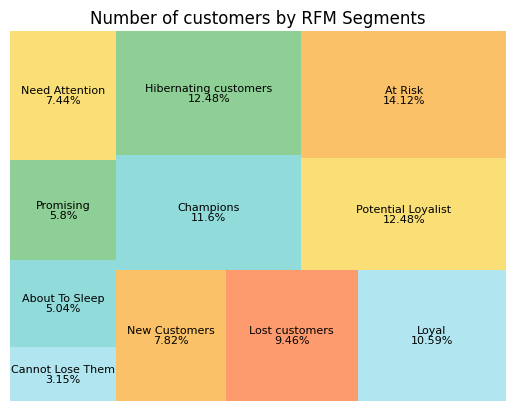

In [22]:
# Treemap Customers number
count_map = sq.plot(sizes=segmentation_data['customer_count'],
                    label=segmentation_data['segment'],
                    color= ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30'],
                    alpha=.7,
                    text_kwargs={'fontsize':8},
                    value=[f'{x}%' for x in segmentation_data['customer_share']])
plt.title('Number of customers by RFM Segments')
plt.axis("off")
plt.show()

In [23]:
# Build a treemap of customer segmentation
treemap_data = customer_segmentation.groupby('segment').agg(Segment_count=('segment', 'count')).reset_index()
fig = px.treemap(treemap_data, path=['segment'], values='Segment_count', title='Treemap of customer segmentation')
fig.show()

NameError: ignored

In [24]:
RFM_discribe = customer_segmentation[['Recency','Frequency','Monetary']]
RFM_discribe.describe()

,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,147.802018,12.602774,2896.848500
std,186.211051,6.242559,2628.670117
min,1.000000,1.000000,4.833000
25%,31.000000,8.000000,1146.050000
50%,76.000000,12.000000,2256.394000
75%,184.000000,16.000000,3785.276000
max,1166.000000,37.000000,25043.050000


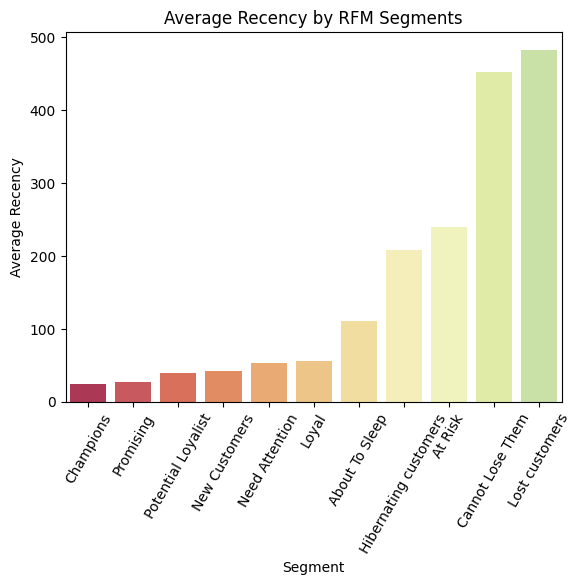

In [25]:
# bar chart Average Recency by RFM segments
r_chart = sns.barplot(x='segment',
            y='avg_recency',
            data = segmentation_data.sort_values('avg_recency'),
            palette=color2)
r_chart.set_title('Average Recency by RFM Segments')
r_chart.set(xlabel='Segment',
            ylabel='Average Recency')
plt.xticks(rotation=60)
plt.show()

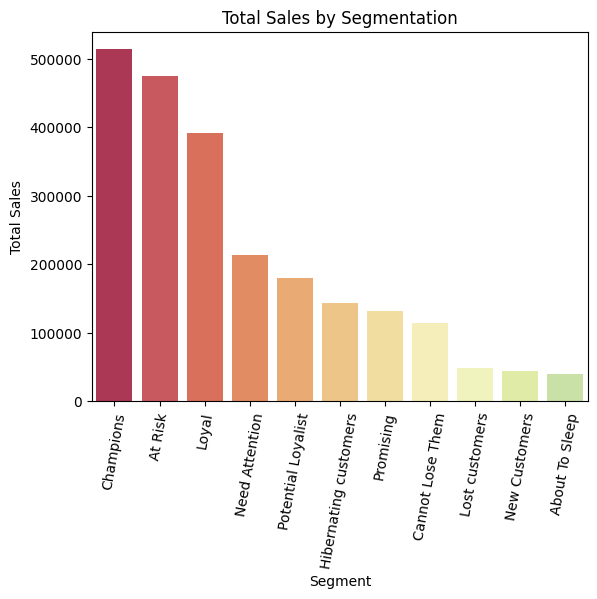

In [26]:
# Bar chart Total Sales by Segmentation
f_chart =sns.barplot(x='segment',
            y='sum_monetory',
            data= segmentation_data.sort_values('sum_monetory',ascending=False),
            palette=color2)
f_chart.set_title('Total Sales by Segmentation')
f_chart.set(xlabel='Segment',
            ylabel='Total Sales')
plt.xticks(rotation=80)
plt.show()

# Define of classification and strategy for each customer segment
|Customer Segment         | Activity           | Actionable Tip   |
|:-------------|:-------------|:------|
|Champions   | Bought recently, buy often, and spend the most!|Reward them. Can be early adopters for new products. Will promote your brand. |
|Loyal Customers    | Spend good money with us often. Responsive to promotions.      |   Upsell higher-value products. Ask for reviews. Engage them|
| Potential Loyalist |Recent customers, but spent a good amount and bought more than once    |Offer membership/loyalty program, and recommend other products.|
|Recent Customers |Bought most recently, but not often| Provide onboarding support, give them early success, and start building relationships|
|Promising | Recent shoppers, but haven’t spent much|Create brand awareness, and offer free trials|
| Needing Attention| Above average recency, frequency, and monetary values. May not have bought it very recently though|Make limitedtime offers, and recommend based on past purchases. Reactivate them
| About To Sleep| Below average recency, frequency, and monetary values. Will lose them if not reactivated|Share valuable resources, recommend popular products/renewals at discounts, and reconnect with them |
| At Risk|Spent big money and purchased often. But a long time ago. Need to bring them back!|Send personalized emails to reconnect, offer renewals, and provide helpful resources|
|Can’t Lose Them|Made biggest purchases, and often. But haven’t returned for a long time|Win them back via renewals or newer products, don’t lose them to competition, talk to them |
| Hibernating|Last purchase was long back, with low spenders and a low number of orders |Offer other relevant products and special discounts. Recreate brand value |
| Lost|Lowest recency, frequency, and monetary scores|Revive interest with reach-out campaign, ignore otherwise. |


In [27]:
#Load table product and remove duplicates
product = pd.read_excel('Dataset.xlsx',sheet_name='Product')
product.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB


In [28]:
# Check if 'Order ID' is unique
product['Product ID'].is_unique

False

In [29]:
product.drop_duplicates(inplace=True)

In [30]:
orders_pre = pd.read_excel('Dataset.xlsx',sheet_name='Orders')
orders_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [31]:
# Check if 'Order ID' is unique
orders_pre['Order ID'].is_unique

False

In [32]:
# check duplicate records
orders_pre.duplicated().sum()

0

In [33]:
# Merge the orders_pre, product, returned,loaction, cus_seg tables to get a full table of information
data = orders_pre.merge(product, on='Product ID', how='left')\
                 .merge(Returned,on='Order ID',how='left')\
                 .merge(customer_segmentation[['Customer ID','segment']],left_on='Customer ID',right_on='Customer ID',how='left')

In [34]:
# Create extra columns containing orders by years
data['year']=data['Order Date'].dt.strftime("%Y")

In [35]:
# Split the table with only the Potential Loyalist segment
potential = data.query('segment=="Potential Loyalist" and Returned!="Yes"')

In [36]:
# Potential loyal customers: Breakdown of orders, sales and cart value by years
potential_ord=potential.groupby('year').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum')).reset_index()

In [37]:
# add columns cart_value
potential_ord['cart_value']= potential_ord['sales']/potential_ord['ord_count']

In [38]:
# calculate the year-over-year change of orders, sales, and cart_value over the years
potential_ord['count_yoy'] = potential_ord['ord_count'].pct_change().round(4)*100
potential_ord['sales_yoy'] = potential_ord['sales'].pct_change().round(4)*100
potential_ord['cart_yoy'] = potential_ord['cart_value'].pct_change().round(4)*100
potential_ord.sort_values(by='year',inplace=True)

potential_ord

,year,ord_count,sales,cart_value,count_yoy,sales_yoy,cart_yoy
0,2014,121,31381.6570,259.352537,NaN,NaN,NaN
1,2015,122,27683.6700,226.915328,0.83,-11.78,-12.51
2,2016,152,43946.3470,289.120704,24.59,58.74,27.41
3,2017,266,64480.2734,242.407043,75.00,46.72,-16.16


* The orders in general increased in the period 2014–2017; there was a decrease of 18.29% in 2016 but an increase of 61.34% to reach 313 orders in 2017.


* Order value in 2017 decreased by 12.26% while the number of orders increased by 61% and revenue increased by 41.46%.

In [39]:
# Calculate orders count, sales and cart value by Category in 2016 and 2017

potential_cate = potential.groupby(['year','Category']).agg(ord_count=('Order ID','nunique'),
                               sales = ('Sales','sum'))
potential_cate['cart_value'] = potential_cate['sales']/potential_cate['ord_count']
potential_cate.sort_values(by=['Category','year'],inplace=True)
potential_cate = potential_cate.query('year=="2016" or year=="2017"').reset_index()
potential_cate

,year,Category,ord_count,sales,cart_value
0,2016,Furniture,55,20246.5450,368.119000
1,2017,Furniture,86,21275.0444,247.384237
2,2016,Office Supplies,105,12359.6200,117.710667
3,2017,Office Supplies,202,26022.9150,128.826312
4,2016,Technology,32,11340.1820,354.380688
5,2017,Technology,76,17182.3140,226.083079


Category: Furniture and Technology In 2017, although the number of orders and revenue increased, the cart value decreased, specifically:
* The furniture category in 2017 increased the number of orders by 53% (from 62 to 95 orders), but the order value decreased by 18% (from 326 USD to 226 USD).
* The technology category in 2017 increased the number of orders by 38% (from 40 to 74 orders), but the order value decreased by 31% (from 383 USD to 266 USD).

Text(0.5, 1.0, 'Cart value by Category of Potential Loyalist')

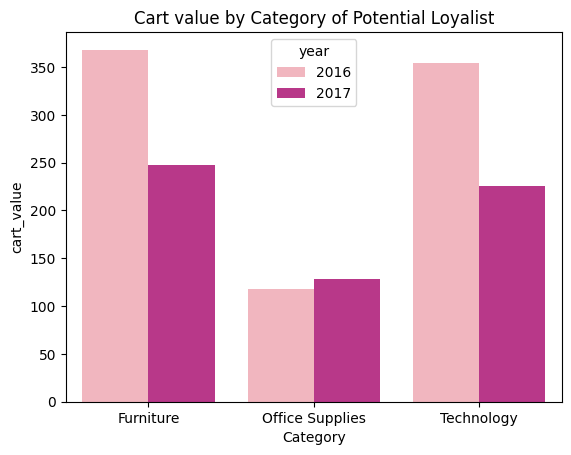

In [ ]:
# Visualize cart_value by year by category
sns.barplot(data=potential_cate, x='Category',y='cart_value',hue='year', palette='RdPu')
plt.title('Cart value by Category of Potential Loyalist')

In [40]:
# Analysis of the number of orders, revenue and order value of each Channel in 2016 and 2017
potential_chan = potential.groupby(['year','Channel']).agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
potential_chan['cart_value']= potential_chan['sales']/potential_chan['ord_count']
potential_chan.sort_values(by=['Channel','year'],inplace=True)
potential_chan.query('year=="2016" or year=="2017"').reset_index()
potential_chan

,,ord_count,sales,cart_value
year,Channel,,,
2014,Consumer,62,14542.2580,234.552548
2015,Consumer,65,14058.8960,216.290708
2016,Consumer,79,25838.6550,327.071582
2017,Consumer,137,31238.7142,228.019812
2014,Corporate,39,12301.7080,315.428410
2015,Corporate,48,12470.8480,259.809333
2016,Corporate,48,11979.9540,249.582375
2017,Corporate,77,18015.5862,233.968652
2014,Home Office,20,4537.6910,226.884550


There is a change in the purchasing behavior of two channels, consumer and home office, in 2017. They tend to place more orders, but the value of each order is lower, specifically:
* The consumer  in 2017 increased orders by 40% (from 112 to 186 orders), but order value decreased by 26% (from 292 dollars to 214 dollars).
* Home Office in 2017 increased orders by 76% (from 30 to 53), but order values decreased by 22% (from 276 dollars to 225 dollars).

In [41]:
# Calculate the average order value of the Potential Loyalist segment
potential_cart_value = potential['Sales'].sum()/potential['Order ID'].nunique()
potential_cart_value.round(2)

253.39

In [42]:
# Find the top 5 Sub-cats with the most orders of the Potential Loyalist segment
potential_sub= potential.groupby('Sub-Category').agg({'Order ID':'count','Sales':'sum'}).reset_index()
potential_sub.sort_values(by='Order ID',ascending=False,inplace=True)
potential_sub.head(5)

,Sub-Category,Order ID,Sales
12,Paper,224,12667.092
3,Binders,203,10741.462
9,Furnishings,142,13817.454
14,Storage,112,17288.694
0,Accessories,110,16309.976


Text(0.5, 1.0, 'Total sales and cart value of Potential Loyalist')

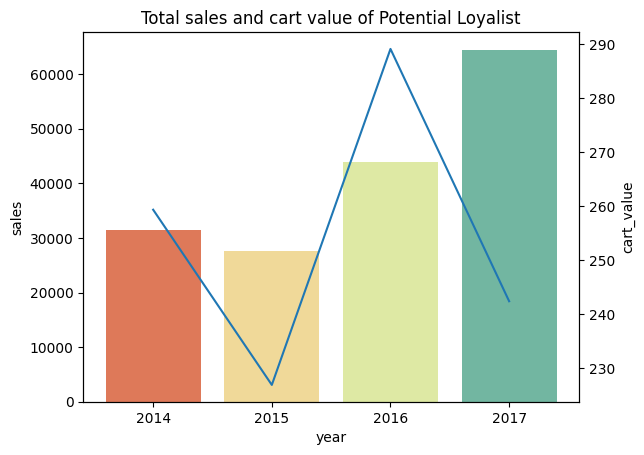

In [43]:
# Visualize sales and cart_value
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(data= potential_ord, x='year',y= 'sales', palette='Spectral', ax=ax1)
sns.lineplot(data= potential_ord, x='year',y= 'cart_value',ax=ax2)
plt.title('Total sales and cart value of Potential Loyalist')

- The number of orders in general increased in the period 2014–2017; there was a decrease of 18.29% in 2016 but then increased by 61.34% in 2017, reaching 313 orders.
- Revenue in the period 2014–2017 increased to 72641 dollars at a rate of 41.56% in 2017.
- Although the number of orders and revenue increased sharply in 2017, the order value in 2017 decreased by 12.26%.

We need to dive into 2016 and 2017 data.

Reccomendation for the Potential Loyalist Segment:

* A special promotion is required for orders that buy products in the same group and reach a value above $238.68 to motivate customers to buy related products and increase the value of each order.

* Offer a membership or loyalty program, focusing on two channels: consumer and home office, and two categories: furniture and technology.

* Recommend to customers the best-selling sub-categories such as paper, binder, furnishings, storage, and art.

In [45]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1444 to 10330
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID_x      1632 non-null   int64         
 1   Order ID      1632 non-null   object        
 2   Order Date    1632 non-null   datetime64[ns]
 3   Ship Date     1632 non-null   datetime64[ns]
 4   Ship Mode     1632 non-null   object        
 5   Customer ID   1632 non-null   object        
 6   Channel       1632 non-null   object        
 7   Postal Code   1632 non-null   int64         
 8   Product ID    1632 non-null   object        
 9   Sales         1632 non-null   float64       
 10  Quantity      1632 non-null   int64         
 11  Unit Cost     1632 non-null   float64       
 12  Row ID_y      1632 non-null   int64         
 13  Category      1632 non-null   object        
 14  Sub-Category  1632 non-null   object        
 15  Product Name  1632 non-null   obje

In [46]:
risk.describe()

,Row ID_x,Postal Code,Sales,Quantity,Unit Cost,Row ID_y
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,5062.598039,54308.939951,275.386222,3.727328,60.848566,856.077819
std,2867.216331,32239.801035,771.905791,2.165679,132.762559,510.279385
min,13.000000,1453.000000,0.898000,1.000000,0.604200,3.000000
25%,2518.250000,22153.000000,17.264000,2.000000,3.629600,432.000000
50%,4956.500000,55044.000000,59.700000,3.000000,14.245200,834.500000
75%,7547.250000,90004.000000,240.880500,5.000000,59.914050,1273.000000
max,9990.000000,98502.000000,17499.950000,14.000000,1819.994800,1890.000000


In [48]:
risk.head()

,Row ID_x,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Row ID_y,Category,Sub-Category,Product Name,Returned,segment,year
1444,2268,CA-2017-137470,2017-09-17,2017-09-17,Same Day,TP-21415,Consumer,98115,OFF-PA-10002001,12.960,2,3.3048,1303,Office Supplies,Paper,Xerox 1984,NaN,At Risk,2017
1463,726,CA-2017-144113,2017-09-16,2017-09-20,Standard Class,JF-15355,Consumer,78745,OFF-EN-10001141,17.568,2,5.5998,604,Office Supplies,Envelopes,Manila Recycled Extra-Heavyweight Clasp Envelo...,NaN,At Risk,2017
1464,727,CA-2017-144113,2017-09-16,2017-09-20,Standard Class,JF-15355,Consumer,78745,TEC-PH-10002170,55.992,1,50.3928,605,Technology,Phones,ClearSounds CSC500 Amplified Spirit Phone Cord...,NaN,At Risk,2017
1500,72,CA-2017-114440,2017-09-14,2017-09-17,Second Class,TB-21520,Consumer,49201,OFF-PA-10004675,19.050,3,3.4290,70,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,NaN,At Risk,2017
1503,6810,CA-2017-156237,2017-09-14,2017-09-15,First Class,PS-18760,Consumer,19140,OFF-BI-10000301,3.882,2,3.2350,631,Office Supplies,Binders,GBC Instant Report Kit,NaN,At Risk,2017


In [44]:
# Split the table with only the At Risk segment
risk = data.query('segment=="At Risk" and Returned!="Yes"')
risk.head()

,Row ID_x,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Row ID_y,Category,Sub-Category,Product Name,Returned,segment,year
1444,2268,CA-2017-137470,2017-09-17,2017-09-17,Same Day,TP-21415,Consumer,98115,OFF-PA-10002001,12.960,2,3.3048,1303,Office Supplies,Paper,Xerox 1984,NaN,At Risk,2017
1463,726,CA-2017-144113,2017-09-16,2017-09-20,Standard Class,JF-15355,Consumer,78745,OFF-EN-10001141,17.568,2,5.5998,604,Office Supplies,Envelopes,Manila Recycled Extra-Heavyweight Clasp Envelo...,NaN,At Risk,2017
1464,727,CA-2017-144113,2017-09-16,2017-09-20,Standard Class,JF-15355,Consumer,78745,TEC-PH-10002170,55.992,1,50.3928,605,Technology,Phones,ClearSounds CSC500 Amplified Spirit Phone Cord...,NaN,At Risk,2017
1500,72,CA-2017-114440,2017-09-14,2017-09-17,Second Class,TB-21520,Consumer,49201,OFF-PA-10004675,19.050,3,3.4290,70,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,NaN,At Risk,2017
1503,6810,CA-2017-156237,2017-09-14,2017-09-15,First Class,PS-18760,Consumer,19140,OFF-BI-10000301,3.882,2,3.2350,631,Office Supplies,Binders,GBC Instant Report Kit,NaN,At Risk,2017


In [ ]:
# Calculate orders count, sales and cart value by year
risk_ord = risk.groupby('year').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum')).reset_index()

risk_ord['cart_value'] = risk_ord['sales']/risk_ord['ord_count']

risk_ord['count_yoy'] = risk_ord['ord_count'].pct_change().round(4)*100
risk_ord['sales_yoy'] = risk_ord['sales'].pct_change().round(4)*100
risk_ord['cart_yoy'] = risk_ord['cart_value'].pct_change().round(4)*100
risk_ord.sort_values(by='year',inplace=True)
risk_ord

,year,ord_count,sales,cart_value,count_yoy,sales_yoy,cart_yoy
0,2014,158,100215.5265,634.275484,NaN,NaN,NaN
1,2015,197,101151.7239,513.460527,24.68,0.93,-19.05
2,2016,208,147487.4578,709.074316,5.58,45.81,38.10
3,2017,175,100575.6058,574.717747,-15.87,-31.81,-18.95


In 2016, the number of orders decreased slightly (1.02%), but revenue and order value increased by 24.87% and 26.15%, respectively.
In 2017, there was a decrease in all three indicators:
* The number of orders decreased by 21.65% to 152.

* Revenue is down 29.67% to $80524.

* Order value reduced by 10.24% to $530 per order

In [ ]:
# Analysis of orders, revenue, and order value for each category in 2016 and 2017
risk_cate = risk.groupby(['year','Category']).agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
risk_cate['cart_value'] = risk_cate['sales']/risk_cate['ord_count']
risk_cate.sort_values(by=['Category','year'],inplace=True)
risk_cate = risk_cate.query('year=="2016" or year=="2017"').reset_index()
risk_cate

,year,Category,ord_count,sales,cart_value
0,2017,1444,1,12.960,12.960
1,2017,1463,1,17.568,17.568
2,2017,1464,1,55.992,55.992
3,2017,1500,1,19.050,19.050
4,2017,1503,1,3.882,3.882
...,...,...,...,...,...
817,2016,6089,1,23.076,23.076
818,2016,6090,1,25.920,25.920
819,2016,6091,1,191.472,191.472
820,2016,6092,1,5.248,5.248


Text(0.5, 1.0, 'Total sales and cart value of At Risk segment')

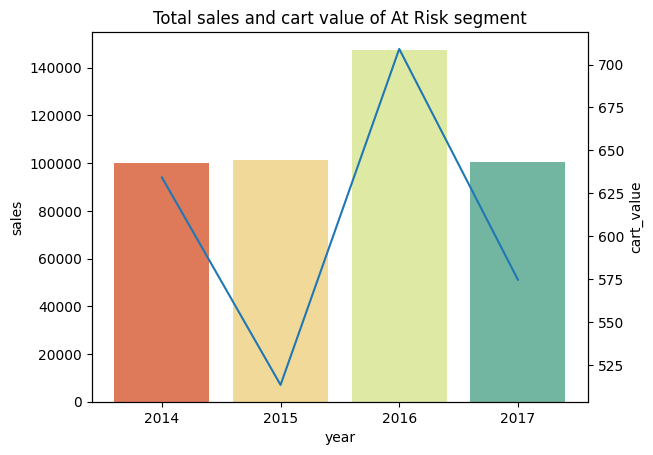

In [ ]:
# Visualize sales and cart_value
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(data= risk_ord, x='year',y= 'sales', palette='Spectral', ax=ax1)
sns.lineplot(data= risk_ord, x='year',y= 'cart_value',ax=ax2)
plt.title('Total sales and cart value of At Risk segment')

In [ ]:
# Visualize cart_value by year by category
# sns.barplot(data=risk_cate, x='Category',y='cart_value',hue='year', palette='mako')
# plt.title('Cart value by Category of At Risk segment')

In 2017, all 3 categories showed a decrease in orders and revenue, and 2 categories, Office Supplies and Technology, experienced a decrease in order value:
* Office Supplies in 2017 order value decreased by 23% (from 263 dollars to 203 dollars).

* Technology in 2017 order value decreased by 22% (from 836 dollars to 651 dollars).

Meanwhile, the furniture increased the order value from 350 dollars to 476 dollars.

In [ ]:
# Analysis of the number of orders, revenue, and order value of each channel in 2016 and 2017
risk_chan= risk.groupby(['year','Channel']).agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
risk_chan['cart_value']= risk_chan['sales']/risk_chan['ord_count']
risk_chan.sort_values(by=['Channel','year'],inplace=True)
risk_chan.query('year=="2016" or year=="2017"')


,,ord_count,sales,cart_value
year,Channel,,,
2016,Consumer,95,54042.4328,568.867714
2017,Consumer,91,36825.4990,404.675813
2016,Corporate,74,73774.6950,996.955338
2017,Corporate,55,36911.8308,671.124196
2016,Home Office,39,19670.3300,504.367436
2017,Home Office,29,26838.2760,925.457793


In 2017, while the consumer and corporate channels experienced a decrease in orders, revenue, and cart value, the home office channel, despite a decrease in the number of orders, recorded an increase in revenue and cart value.
* The consumer reduced the number of orders by 17% and the order value by 38%.
* The corporate reduced the number of orders by 26% and the value of orders by 5%.
* The office reduced the number of orders by 25%, but the order value increased by 73%.

In [ ]:
# Find the top 5 sub-categories with the most orders in the At Risk segment.
risk_sub= risk.groupby('Sub-Category').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
risk_sub['cart_value']= risk_sub['sales']/risk_sub['ord_count']
risk_sub.sort_values(by='ord_count',ascending=False,inplace=True)
risk_sub.head(5)

,ord_count,sales,cart_value
Sub-Category,,,
Binders,189,29968.188,158.561841
Paper,188,13074.712,69.546340
Furnishings,138,14087.038,102.079986
Phones,131,52658.750,401.975191
Storage,117,39023.774,333.536530


In [ ]:
# Analysis of the number of orders by each Ship Mode
risk_ship_mode = risk.groupby('Ship Mode').agg(ord_count=('Order ID','nunique')).reset_index()
risk_ship_mode.sort_values(by='ord_count',ascending=False,inplace=True)
risk_ship_mode

,Ship Mode,ord_count
3,Standard Class,438
2,Second Class,134
0,First Class,121
1,Same Day,45


Orders in the At Risk segment mainly use Standard Class shipping packages, accounting for 60%

In [ ]:
# Orders are returned in the At Risk group
risk_return =  data.query('segment=="At Risk" and Returned=="Yes"')

In [ ]:
# Categories eturned the most by the At-Risk group
cate_return= risk_return.groupby('Category').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
cate_return['cart_value']= cate_return['sales']/cate_return['ord_count']
cate_return.sort_values(by='ord_count',ascending=False,inplace=True)
cate_return

,ord_count,sales,cart_value
Category,,,
Office Supplies,48,14653.213,305.275271
Technology,29,15991.136,551.418483
Furniture,24,11415.636,475.651500


2 groups of office supplies and technology have 34 and 22 returned orders, respectively. These are also the two groups that experienced a decrease in the number of orders, revenue, and order value in 2017 (as analyzed above).
- The Furniture group has the lowest number of returned orders (15 orders) and is the group with the highest order value in 2017

In [ ]:
chan_return= risk_return.groupby('Channel').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
chan_return['cart_value']= chan_return['sales']/chan_return['ord_count']
chan_return.sort_values(by='ord_count',ascending=False,inplace=True)
chan_return

,ord_count,sales,cart_value
Channel,,,
Corporate,25,20218.573,808.742920
Consumer,21,16624.984,791.665905
Home Office,11,5216.428,474.220727


2 groups Consumers and corporations have returned orders of 19 and 16, respectively. These are also the two groups that experienced a decrease in the number of orders, revenue, and order value in 2017 (as analyzed above).
* The furniture group has the lowest number of returned orders (8 orders) and is the only group with an increase in order value in 2017.

Recommendations for the At-Risk Segment:
* Groups of channels and categories with a high number of return orders all have a decrease in the number of orders, revenue, and order value. Need an incentive program (exchange reward points, gifts, or vouchers) for customers in this group? We conducted a survey to find out the main reason why customers have not come back to buy more products for a long time.
* Nearly 60% of orders use Ship Mode Standard Class, the free upgrade to Second Class policy can be included in the gratitude program.
* Provide useful information and recommend to customers the best-selling sub-categories such as binders, paper, furnishings, phones, and storage.
* Send personalized emails to special gratitude programs to reconnect with this segment.